In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [2]:
class QuadState(TypedDict):
    a: int
    b: int
    c: int
    
    equation: str
    discriminant: float
    result: str

In [3]:
def show_equation(state: QuadState):
    equation = f'{state["a"]}x2{state["b"]}x{state["c"]}'
    return {'equation':equation}

In [4]:
def calculate_discriminant(state: QuadState):
    discriminant = state["b"]**2 - (4*state["a"]*state["c"])
    return {'discriminant': discriminant}

In [5]:
def real_roots(state: QuadState):
    root1 = (-state["b"] + state["discriminant"]**0.5)/(2*state["a"])
    root2 = (-state["b"] - state["discriminant"]**0.5)/(2*state["a"])

    result = f'The roots are {root1} and {root2}'

    return {'result': result}

In [7]:
def repeating_roots(state: QuadState):
    root = (-state["b"])/(2*state["a"])
    result = f'Only repeating root is {root}'
    return {'result': result}

In [8]:
def img_roots(state: QuadState):
    result = f'No real roots'
    return {'result': result}

In [13]:
def check_condition(state: QuadState) -> Literal["real_roots", "repeating_roots", "img_roots"]:
    if state['discriminant'] > 0:
        return "real_roots"
    elif state['discriminant'] == 0:
        return "repeating_roots"
    else:
        return "img_roots"

In [14]:
# Define the graph
graph = StateGraph(QuadState)

# ADd the nodes
graph.add_node('show_equation', show_equation)
graph.add_node('calculate_discriminant', calculate_discriminant)
graph.add_node('real_roots', real_roots)
graph.add_node('repeating_roots', repeating_roots)
graph.add_node('img_roots', img_roots)

# Add the edges
graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calculate_discriminant')
graph.add_conditional_edges('calculate_discriminant', check_condition)
graph.add_edge('real_roots', END)
graph.add_edge('repeating_roots', END)
graph.add_edge('img_roots', END)

In [15]:
# Compile the graph

workflow = graph.compile()

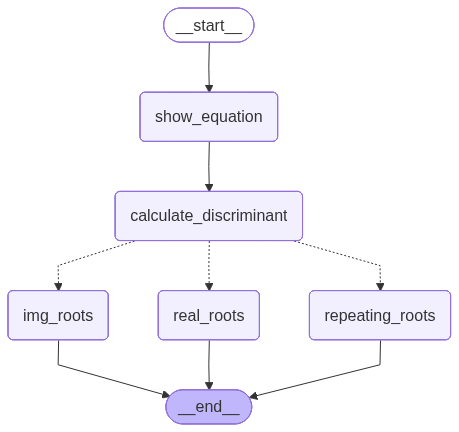

In [16]:
workflow

In [20]:
initial_state = {'a': 1356, 'b': 2465, 'c': 21}
workflow.invoke(initial_state)

{'a': 1356,
 'b': 2465,
 'c': 21,
 'equation': '1356x22465x21',
 'discriminant': 5962321,
 'result': 'The roots are -0.008559573673343894 and -1.8092870339962728'}